# Chapter 7, Figure 1: What?

I don't find this figure terribly enlightening. Your mileage may vary.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from IPython.core.pylabtools import figsize

## Generate some fake data

Pick a simple function of two parameters, `w1` and `w2`. These are the **true** values.

In [51]:
N = 25
w1 = 1.2
w2 = 0.8

np.random.seed(1)
x = np.random.uniform(0, 1, (N,2))
y = w1*x[:,0] + w2*x[:,1] + np.random.normal(0, 0.1, N)

## Build a grid

We're going to visualize the **parameter space**, which we can do because the space has only two dimensions.

We'll build a grid over a bunch of combinations of potential **estimates** of `w1` and `w2`.

In [52]:
xx, yy = np.meshgrid(np.linspace(0, 2, 100), np.linspace(0, 2, 100))
grid = np.stack([xx.reshape(-1), yy.reshape(-1)]).T

## $L_{2}$ norm component

If we're regularizing the model, then one term in our loss function will be the sum of our parameters squared.

If we plot this term by itself, it'll just make circles around the origin:

In [53]:
l2_component = (grid[:,0]**2 + grid[:,1]**2).reshape(xx.shape)

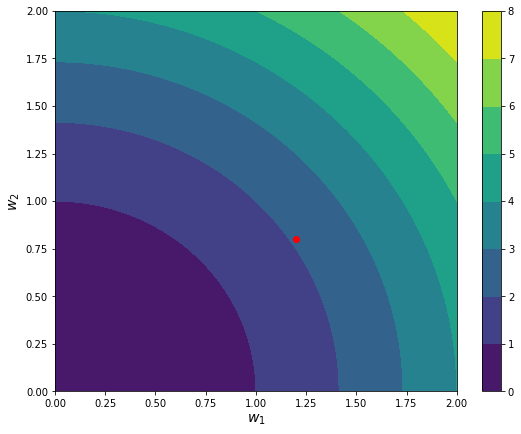

In [54]:
figsize(9,7)
plt.contourf(xx, yy, l2_component)
plt.plot([w1], [w2], "ro")
plt.xlabel("$w_{1}$", fontsize=14)
plt.ylabel("$w_{2}$", fontsize=14)
plt.colorbar();

## RSS component

The main part of the loss function here will be the Residual Sum of Squares- the squared distance between the model estimates and the actual values, over our dataset.

Note that what we're varying here are the model parameters; our data is fixed. The red dot is the "true" values.

In [55]:
rss = []

for i in range(grid.shape[0]):
    w1_est = grid[i,0]
    w2_est = grid[i,1]
    residual = y - (w1_est*x[:,0] + w2_est*x[:,1])
    rss.append(np.mean(residual**2))
    
rss = np.stack(rss).reshape(xx.shape)

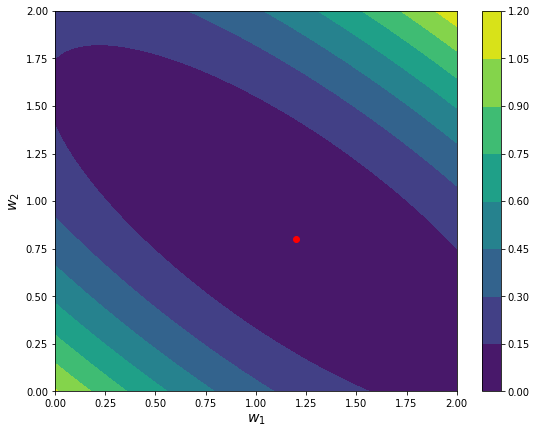

In [56]:
figsize(9,7)
plt.contourf(xx, yy, rss)
plt.plot([w1], [w2], "ro")
plt.xlabel("$w_{1}$", fontsize=14)
plt.ylabel("$w_{2}$", fontsize=14)
plt.colorbar();

## Regularized loss function

To see the effect of regularizing the loss function, just add the two components. Note that the circles won't be centered around the true values of the parameters- ridge regression is a **biased estimator**.

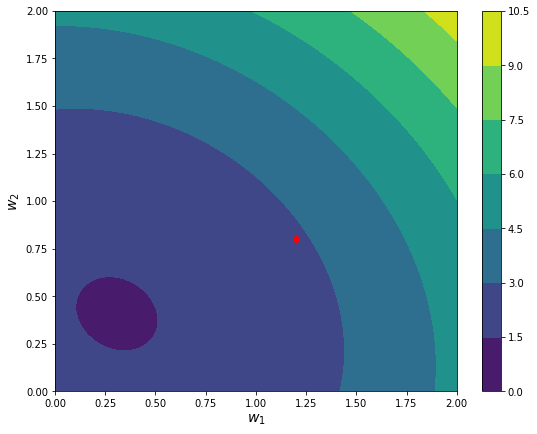

In [50]:
figsize(9,7)
plt.contourf(xx, yy, rss + 0.1*l2_component)
plt.plot([w1], [w2], "ro")
plt.xlabel("$w_{1}$", fontsize=14)
plt.ylabel("$w_{2}$", fontsize=14)
plt.colorbar();